In [16]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
## REading the dataset
Car_df =pd.read_csv('USA_cars_datasets.csv')
Car_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [18]:
Car_df.drop(columns='Unnamed: 0', axis=1, inplace=True)
Car_df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [19]:
#Checking for duplicates
Car_df.loc[Car_df.duplicated]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


In [20]:
#Checking for missing values
Car_df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

<h2 style="color:purple">Exploratory Analyis</h2>

In [6]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   vin           2499 non-null   object
 8   lot           2499 non-null   int64 
 9   state         2499 non-null   object
 10  country       2499 non-null   object
 11  condition     2499 non-null   object
dtypes: int64(4), object(8)
memory usage: 234.4+ KB


In [7]:
Car_df.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [8]:
#Checking for duplicates with 'vin column'
Car_df.loc[Car_df.duplicated(subset = 'vin')]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
518,50,chevrolet,door,2008,salvage insurance,172102,blue,1g1al58f787159241,167650632,texas,usa,17 hours left
530,0,chevrolet,door,2003,salvage insurance,194673,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
541,25,chevrolet,pickup,2010,salvage insurance,149189,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left
661,26900,chevrolet,traverse,2018,clean vehicle,42941,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left


In [9]:
##Droping duplicated rows
Car_df.drop_duplicates(subset='vin')

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [10]:
#Changing the data type of the date column
Car_df['year'] = Car_df['year'].astype(str)

In [11]:
##Getting the descriptve statis of the numerical features
Car_df.describe(exclude='object')

,price,mileage,lot
count,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,5.229869e+04,1.676914e+08
std,12116.094936,5.970552e+04,2.038772e+05
min,0.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2.146650e+04,1.676253e+08
50%,16900.000000,3.536500e+04,1.677451e+08
75%,25555.500000,6.347250e+04,1.677798e+08
max,84900.000000,1.017936e+06,1.678055e+08


In [12]:
# Descriptive statistics for categorical features
Car_df.describe(exclude=['int64','float64'])

,brand,model,year,title_status,color,vin,state,country,condition
count,2499,2499,2499,2499,2499,2499,2499,2499,2499
unique,28,127,30,2,49,2495,44,2,47
top,ford,door,2019,clean vehicle,white,1gnevhkw8jj148388,pennsylvania,usa,2 days left
freq,1235,651,892,2336,707,2,299,2492,832


<h2 style="color:purple">Creating Visualizations</h2>

<h3 style="color:blue">Univariate Analyis</h3>

[Text(0.5, 1.0, 'A distribution of prices')]

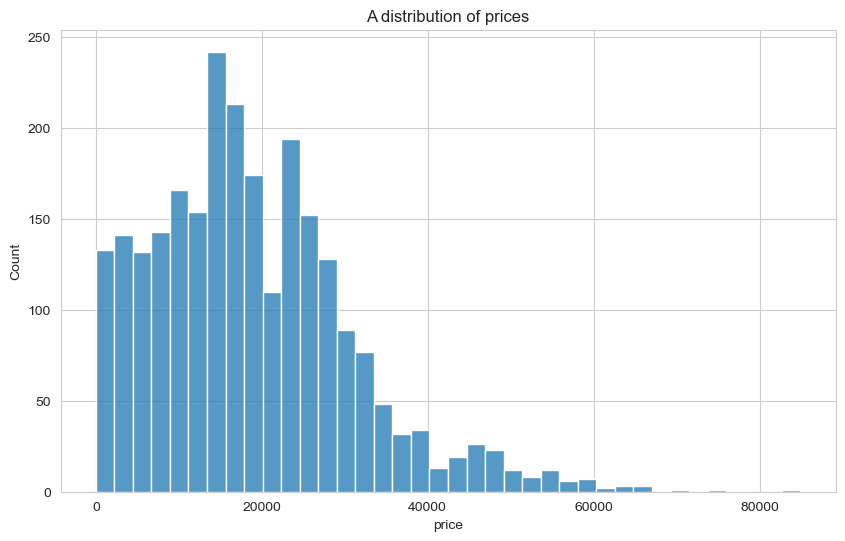

In [13]:
#Distribution of prices
plt.figure(figsize=(10,6))
sns.histplot(Car_df['price']).set(title='A distribution of prices')

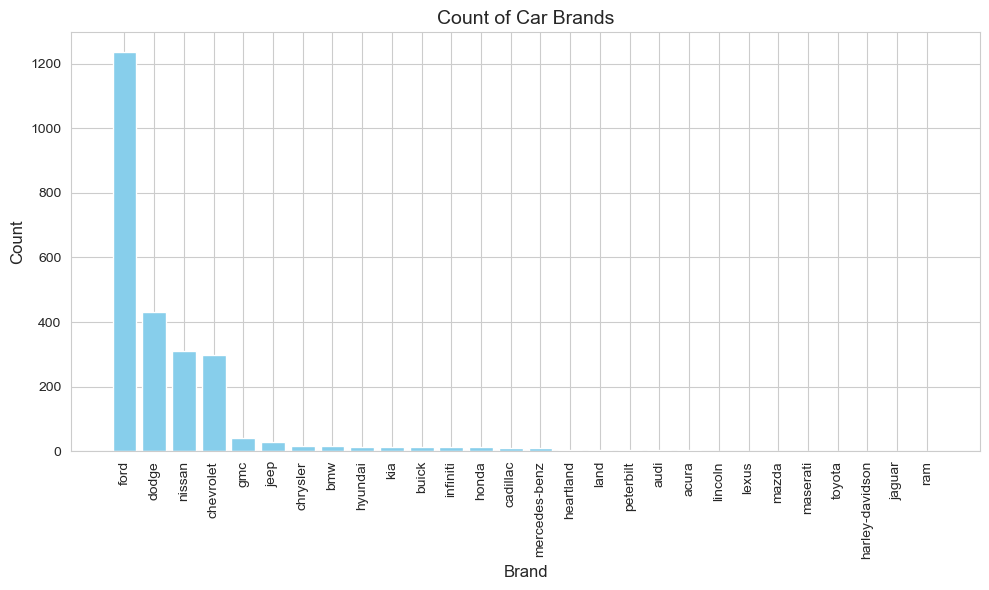

In [14]:

brand_counts = Car_df['brand'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values, color='skyblue')

# Add labels and title
plt.title('Count of Car Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


<h3 style="color:blue">Looking for the most prefered brand</h3>

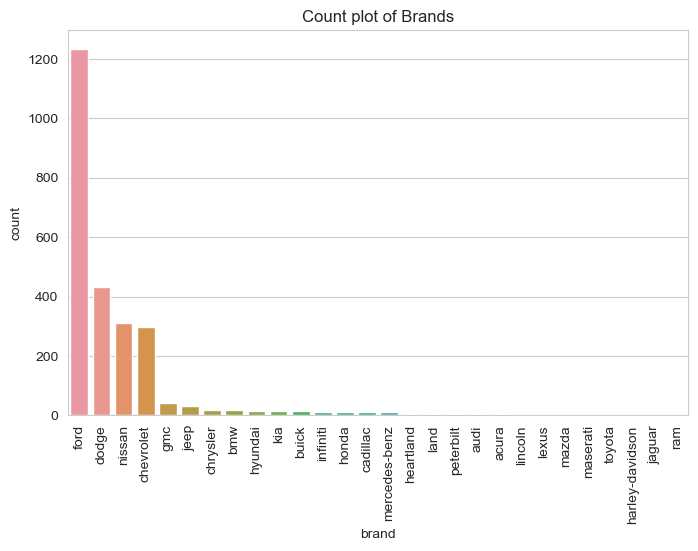

In [23]:
order = Car_df['brand'].value_counts().index
plt.figure(figsize=(8,5))
sns.countplot(Car_df, x ='brand', order=order).set(title='Count plot of Brands')
plt.xticks(rotation=90);

<h3 style="color:blue">The Most prefered brand here is ford </h3>

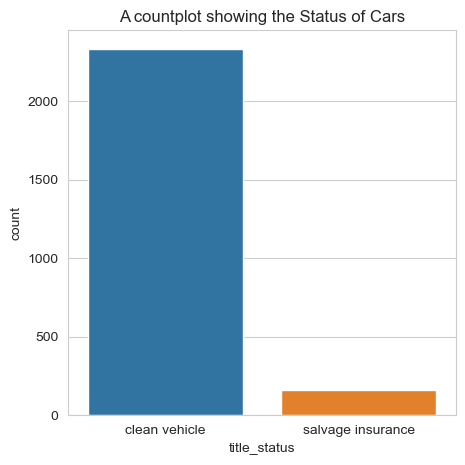

In [24]:
## Status of the Cars
plt.figure(figsize=(5,5))
sns.countplot(Car_df, x ='title_status').set(title='A countplot showing the Status of Cars');

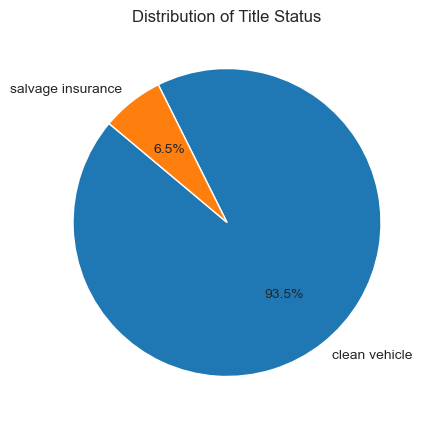

In [26]:
##Bar chart of car status
plt.figure(figsize=(5, 5))
plt.pie(Car_df['title_status'].value_counts(), labels=Car_df['title_status'].unique(), autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Title Status');

<h3 style="color:blue">Bivariate Analyis</h3>

[Text(0.5, 1.0, 'A Scatter Plot of Mileage and Price')]

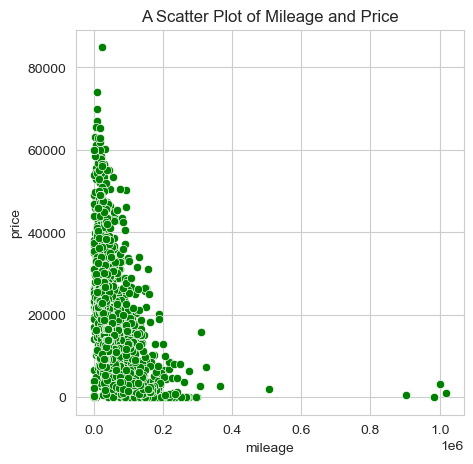

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(Car_df, x='mileage', y='price', color='green').set(title='A Scatter Plot of Mileage and Price')

<h2 style="color:purple">Preparing Data for the model</h2>

In [44]:
Car_df

,price,brand,year,title_status,mileage,country,condition
0,6300,toyota,2008,clean vehicle,274117,usa,10 days left
1,2899,ford,2011,clean vehicle,190552,usa,6 days left
2,5350,dodge,2018,clean vehicle,39590,usa,2 days left
3,25000,ford,2014,clean vehicle,64146,usa,22 hours left
4,27700,chevrolet,2018,clean vehicle,6654,usa,22 hours left
...,...,...,...,...,...,...,...
2494,7800,nissan,2019,clean vehicle,23609,usa,1 days left
2495,9200,nissan,2018,clean vehicle,34553,usa,21 hours left
2496,9200,nissan,2018,clean vehicle,31594,usa,21 hours left
2497,9200,nissan,2018,clean vehicle,32557,usa,2 days left


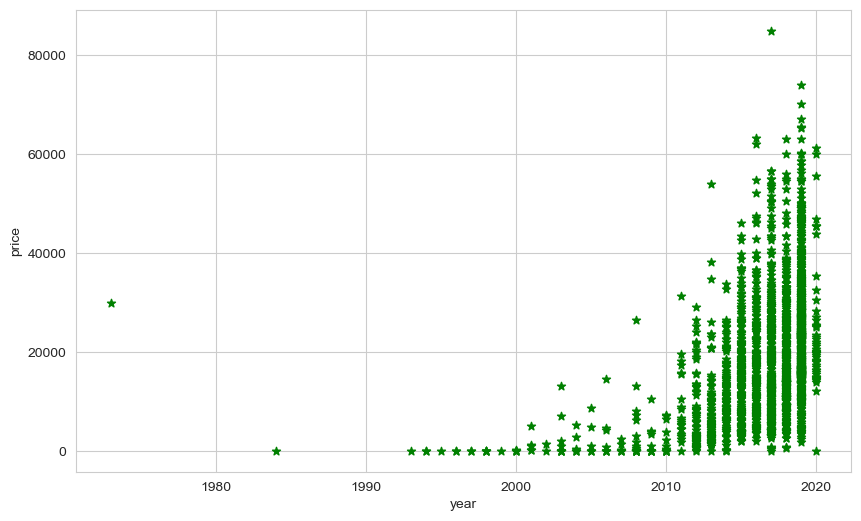

In [51]:
plt.figure(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('price')
plt.scatter(Car_df['year'], Car_df['price'], color='green', marker='*')

In [52]:
# Extract the independent variable (year) and dependent variable (per capita income)
X = Car_df[['year']]  # Independent variable (must be 2D for sklearn)
y = Car_df['price']  # Dependent variable

In [53]:
# Split the data into training and testing sets (optional, for evaluation purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Create a linear regression model
model = LinearRegression()

In [55]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Print the model's slope (coefficient) and intercept
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): 1383.6019463596551
Model Intercept: -2771702.97244781


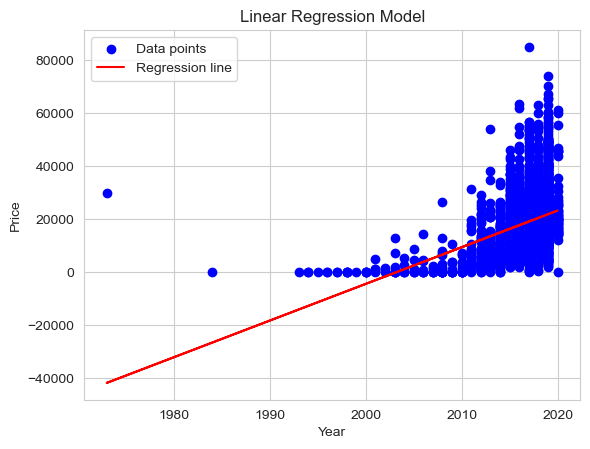

In [57]:
# Visualize the training data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [63]:
# Predict price for a specific year (e.g., 2020)
year_to_predict = np.array([[2013]])
predicted_income = model.predict(year_to_predict)
print(f"Price of Car for the year {year_to_predict[0][0]}: ${predicted_income[0]:,.2f}")

Price of Car for the year 2013: $13,487.75


C:\Users\Ideal_Focus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
